I. IMPORT LIBRARIES


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


II. READ AND EXPLORE DATA

1. Read data

In [47]:
df= pd.read_csv('dataset.csv')
print(df.head(5))


                                      Tên xe Thương hiệu       Model  \
0           VinFast Fadil 1.4 AT Plus - 2020     VinFast       Fadil   
1   VinFast Lux SA 2.0 Premium 2.0 AT - 2020     VinFast  Lux SA 2.0   
2                 Mazda 3 1.5L Luxury - 2022       Mazda           3   
3                   Kia Cerato 1.6 AT - 2016         Kia      Cerato   
4      Ford EcoSport Titanium 1.5L AT - 2020        Ford    EcoSport   

  Năm sản xuất  Tình trạng Số Km đã đi             Xuất xứ  Kiểu dáng  \
0         2020  Xe đã dùng   40,000 Km  Lắp ráp trong nước  Hatchback   
1         2020  Xe đã dùng   60,000 Km  Lắp ráp trong nước        SUV   
2         2022  Xe đã dùng   30,000 Km  Lắp ráp trong nước      Sedan   
3         2016  Xe đã dùng   72,000 Km  Lắp ráp trong nước      Sedan   
4         2020  Xe đã dùng   35,000 Km  Lắp ráp trong nước        SUV   

       Hộp số      Động cơ Số chỗ ngồi Số cửa                     Dẫn động  \
0  Số tự động  Xăng  1.4 L       5 chỗ  5 cửa     

Check null value

In [48]:
df=pd.read_csv('dataset.csv')
missing_values = df.isnull().sum()
print(missing_values)

Tên xe           0
Thương hiệu      0
Model            0
Năm sản xuất     0
Tình trạng       0
Số Km đã đi      0
Xuất xứ          0
Kiểu dáng        0
Hộp số           0
Động cơ          0
Số chỗ ngồi      0
Số cửa           0
Dẫn động         0
Giá thành       50
dtype: int64


2. Check the value of each column.

In [49]:
df=pd.read_csv('dataset.csv')
for column in df.columns:
    if column == 'Dẫn động':
    
        unique_values = df[column].unique()
        print(f"\nColumn: {column}")
        print(f"Number of unique values: {len(unique_values)}")
        print("Unique values and their counts:")
        print(df[column].value_counts())


Column: Dẫn động
Number of unique values: 41
Unique values and their counts:
Dẫn động
FWD - Dẫn động cầu trước       20276
RFD - Dẫn động cầu sau          9141
AWD - 4 bánh toàn thời gian     6302
4WD - Dẫn động 4 bánh           2806
-                                 12
 65 Triệu                          9
 135 Triệu                         3
 120 Triệu                         3
 350 Triệu                         2
 125 Triệu                         2
 115 Triệu                         2
 138 Triệu                         1
 200 Triệu                         1
 170 Triệu                         1
 142 Triệu                         1
 55 Triệu                          1
 150 Triệu                         1
 198 Triệu                         1
 733 Triệu                         1
 499 Triệu                         1
 126 Triệu                         1
4WD hoặc AWD                       1
 310 Triệu                         1
 82 Triệu                          1
 270 Triệu               

In the "Dẫn động" column we found some outliers that are not the value that should be in the "Dẫn động"  attribute. Therefore , we proceed to set the valid values of this attribute to "FWD - Dẫn động cầu trước" ,"RFD - Dẫn động cầu sau" ,"AWD - 4 bánh toàn thời gian" ,"4WD - Dẫn động 4 bánh" and remove all outliers . This can effect the model , but the amount of data deleted here is very small compared to the dataset so the impact is insignificant.

In [50]:
selected_column = 'Dẫn động'
valid_values = ['FWD - Dẫn động cầu trước','RFD - Dẫn động cầu sau','AWD - 4 bánh toàn thời gian','4WD - Dẫn động 4 bánh']
df_filtered = df[df[selected_column].isin(valid_values)]
df_filtered.to_csv('data.csv', index=False)

After processing, we save the new data in the file "data.csv" so as not to affect the original data

In [51]:
df=pd.read_csv('data.csv')
print(df.shape)
print(df.info)

(38525, 14)
<bound method DataFrame.info of                                           Tên xe    Thương hiệu       Model  \
0               VinFast Fadil 1.4 AT Plus - 2020        VinFast       Fadil   
1       VinFast Lux SA 2.0 Premium 2.0 AT - 2020        VinFast  Lux SA 2.0   
2                     Mazda 3 1.5L Luxury - 2022          Mazda           3   
3                       Kia Cerato 1.6 AT - 2016            Kia      Cerato   
4          Ford EcoSport Titanium 1.5L AT - 2020           Ford    EcoSport   
...                                          ...            ...         ...   
38520           BMW 3 Series 330i M Sport - 2022            BMW    3 Series   
38521        Mercedes Benz GLC 300 4Matic - 2022  Mercedes Benz         GLC   
38522                        Lexus RX 350 - 2022          Lexus          RX   
38523      Hyundai Tucson 2.0 AT Đặc biệt - 2021        Hyundai      Tucson   
38524         Mercedes Benz GLB 35 4Matic - 2022  Mercedes Benz         GLB   

       

Recheck value of each column

In [52]:
df=pd.read_csv('data.csv')
missing_values = df.isnull().sum()
print(missing_values)

Tên xe          0
Thương hiệu     0
Model           0
Năm sản xuất    0
Tình trạng      0
Số Km đã đi     0
Xuất xứ         0
Kiểu dáng       0
Hộp số          0
Động cơ         0
Số chỗ ngồi     0
Số cửa          0
Dẫn động        0
Giá thành       0
dtype: int64


In [53]:
df=pd.read_csv('data.csv')
for column in df.columns:
    if column == 'Động cơ':
    
        unique_values = df[column].unique()
        print(f"\nColumn: {column}")
        print(f"Number of unique values: {len(unique_values)}")
        print("Unique values and their counts:")
        print(df[column].value_counts())


Column: Động cơ
Number of unique values: 103
Unique values and their counts:
Động cơ
Xăng  2.0 L      8299
Xăng  1.5 L      6496
Dầu  2.0 L       1972
Xăng  1.6 L      1930
Dầu  2.2 L       1769
                 ... 
Hybrid  5.0 L       1
Dầu  4.0 L          1
Hybrid  1.3 L       1
Dầu  7.8 L          1
Hybrid  3.0 L       1
Name: count, Length: 103, dtype: int64


As for "Động cơ" attributes, we found that their values are quite diverse and non-variable so we made some changes to them for ease of use.

In [54]:
df[['Loại nhiên liệu', 'Dung tích động cơ', 'Đơn vị động cơ']] = df['Động cơ'].str.extract(r'(\D+) (\d+\.\d+) (\w+)')
df=df.drop(['Động cơ'],axis =1)

In [55]:
df.to_csv('data.csv',index=False)

In [56]:
df=pd.read_csv('data.csv')
missing_values = df.isnull().sum()
print(missing_values)

Tên xe                 0
Thương hiệu            0
Model                  0
Năm sản xuất           0
Tình trạng             0
Số Km đã đi            0
Xuất xứ                0
Kiểu dáng              0
Hộp số                 0
Số chỗ ngồi            0
Số cửa                 0
Dẫn động               0
Giá thành              0
Loại nhiên liệu      843
Dung tích động cơ    843
Đơn vị động cơ       843
dtype: int64


However, this action caused us to lose 843 rows of data in the newly created columns, but this number is still not significant compared to the data set so we will delete them.

In [57]:
df=pd.read_csv('data.csv')
df = df.dropna(subset=['Loại nhiên liệu'])
df.to_csv('data.csv',index=False)

In [58]:
print(df.shape)

(37682, 16)


In [59]:
df['Xuất xứ']=df['Xuất xứ'].str.replace('Lắp ráp trong nước','Domestic').str.replace('Nhập khẩu','Imported')
df['Số chỗ ngồi']=df['Số chỗ ngồi'].str.replace(' chỗ','')
df['Số cửa']=df['Số cửa'].str.replace(' cửa','')
df['Tình trạng']=df['Tình trạng'].str.replace('Xe đã dùng','Used').str.replace('Xe mới','New')
df=df.drop(['Tên xe'],axis =1)
df['Hộp số']=df['Hộp số'].str.replace('Số tự động','Automatic').str.replace('Số tay','Manual').str.replace('Số hỗn hợp','Mixed')
df['Số Km đã đi']=df['Số Km đã đi'].str.replace(' Km','').str.replace(',','')
df['Giá thành']=df['Giá thành'].str.replace(' Triệu','').str.replace(' Tỷ ','')
df['Loại nhiên liệu']=df['Loại nhiên liệu'].str.replace('Xăng','Gas').str.replace('Dầu','Diesel').str.replace('Điện','Electric')
df['Dẫn động']=df['Dẫn động'].str.replace('FWD - Dẫn động cầu trước','FWD - Front Wheel Drive').str.replace('RFD - Dẫn động cầu sau','RFD - Rear Wheel Drive').str.replace('AWD - 4 bánh toàn thời gian','Full Time 4 Wheel Drive').str.replace('4WD - Dẫn động 4 bánh','4WD - 4 Wheel Drive')
df.to_csv('data.csv',index=False)


In [60]:
df=pd.read_csv('data.csv')
missing_values = df.isnull().sum()
print(missing_values)

Thương hiệu          0
Model                0
Năm sản xuất         0
Tình trạng           0
Số Km đã đi          0
Xuất xứ              0
Kiểu dáng            0
Hộp số               0
Số chỗ ngồi          0
Số cửa               0
Dẫn động             0
Giá thành            0
Loại nhiên liệu      0
Dung tích động cơ    0
Đơn vị động cơ       0
dtype: int64


In [61]:
print(df.dtypes)

Thương hiệu           object
Model                 object
Năm sản xuất           int64
Tình trạng            object
Số Km đã đi            int64
Xuất xứ               object
Kiểu dáng             object
Hộp số                object
Số chỗ ngồi            int64
Số cửa                 int64
Dẫn động              object
Giá thành              int64
Loại nhiên liệu       object
Dung tích động cơ    float64
Đơn vị động cơ        object
dtype: object


The "Năm sản xuẩ" attribute seems inappropriate so we will replace it with a new attribute "Tuổi" that represents the time from when the vehicle was manufactured until now.

In [62]:
df['Tuổi'] = 2023 - df['Năm sản xuất']
df = df.drop(['Năm sản xuất'], axis=1)
df.to_csv('data.csv',index= False)

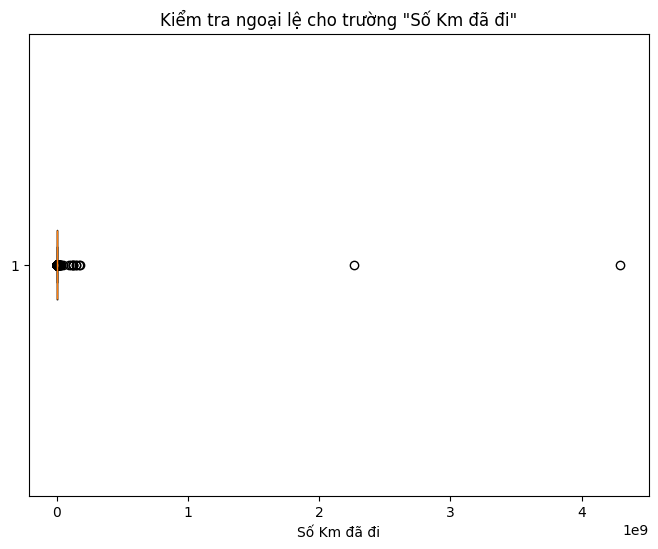

In [63]:
data = pd.read_csv('data.csv')
kilometers = data['Số Km đã đi']
plt.figure(figsize=(8, 6))
plt.boxplot(kilometers, vert=False)
plt.title('Kiểm tra ngoại lệ cho trường "Số Km đã đi"')
plt.xlabel('Số Km đã đi')
plt.show()

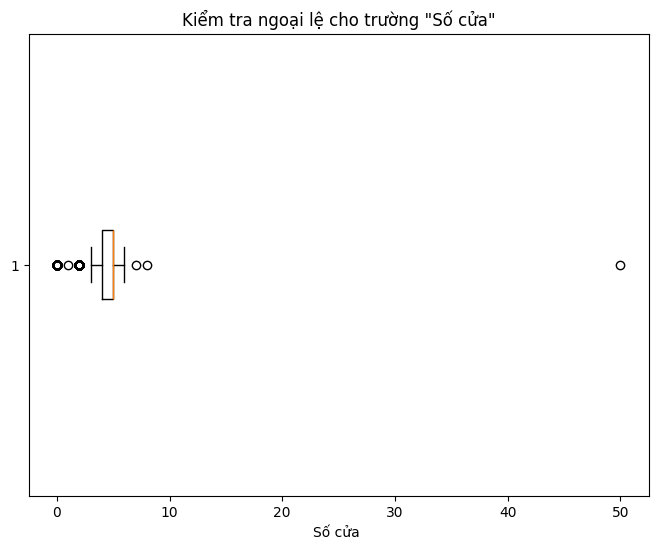

In [64]:
data = pd.read_csv('data.csv')
kilometers = data['Số cửa']
plt.figure(figsize=(8, 6))
plt.boxplot(kilometers, vert=False)
plt.title('Kiểm tra ngoại lệ cho trường "Số cửa"')
plt.xlabel('Số cửa ')
plt.show()

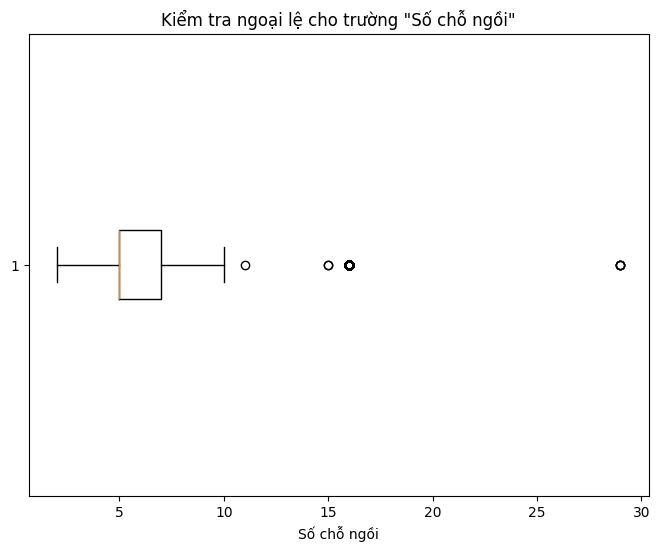

In [65]:
data = pd.read_csv('data.csv')
kilometers = data['Số chỗ ngồi']
plt.figure(figsize=(8, 6))
plt.boxplot(kilometers, vert=False)
plt.title('Kiểm tra ngoại lệ cho trường "Số chỗ ngồi"')
plt.xlabel('Số chỗ ngồi')
plt.show()

Deal with outliers

In [66]:
columns_to_process = ["Số Km đã đi", "Số cửa", "Số chỗ ngồi"]


for column in columns_to_process:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    

    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]


df.to_csv('data.csv', index=False)

In [67]:
print(df.shape)

(35788, 15)


III. Data visualization

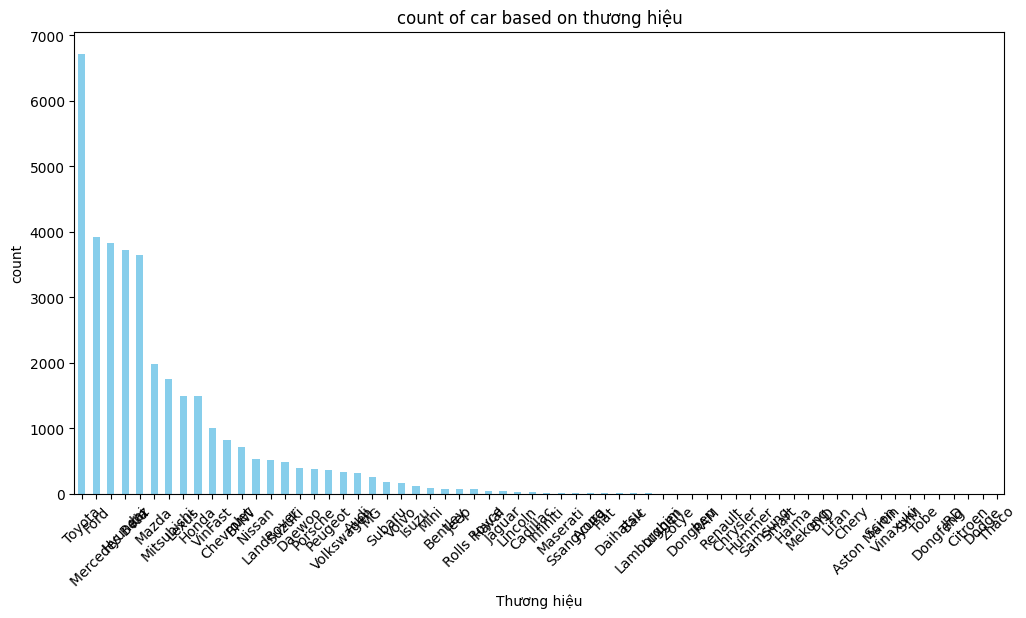

In [68]:
df= pd.read_csv('data.csv')

brand_counts = df['Thương hiệu'].value_counts()


plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('count of car based on thương hiệu')
plt.xlabel('Thương hiệu')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

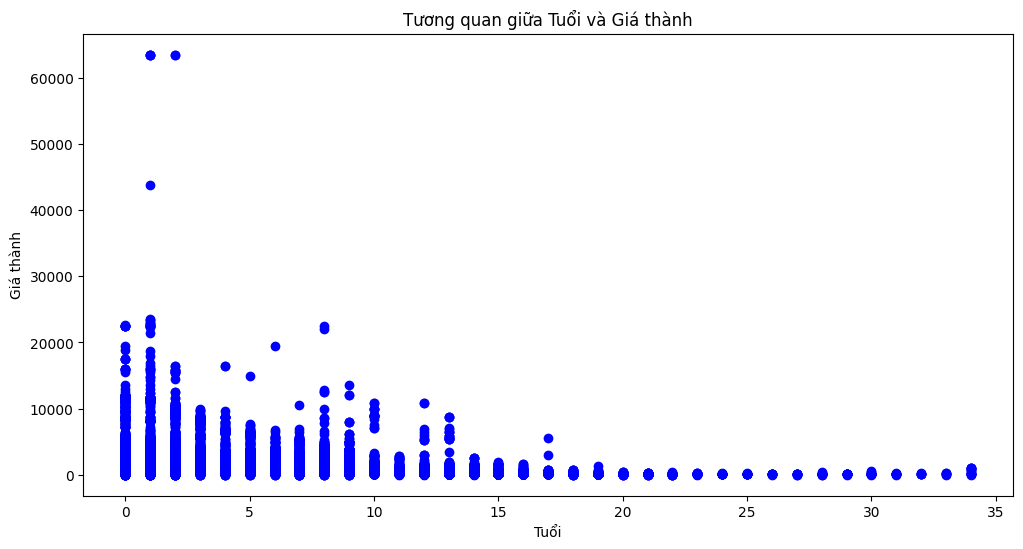

In [69]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Tuổi'], df['Giá thành'], c ="blue")
plt.title('Tương quan giữa Tuổi và Giá thành')
plt.xlabel('Tuổi')
plt.ylabel('Giá thành')
plt.show()

The chart shows that the newer the car, the higher the price, so "Tuổi" is a necessary attribute to train the model

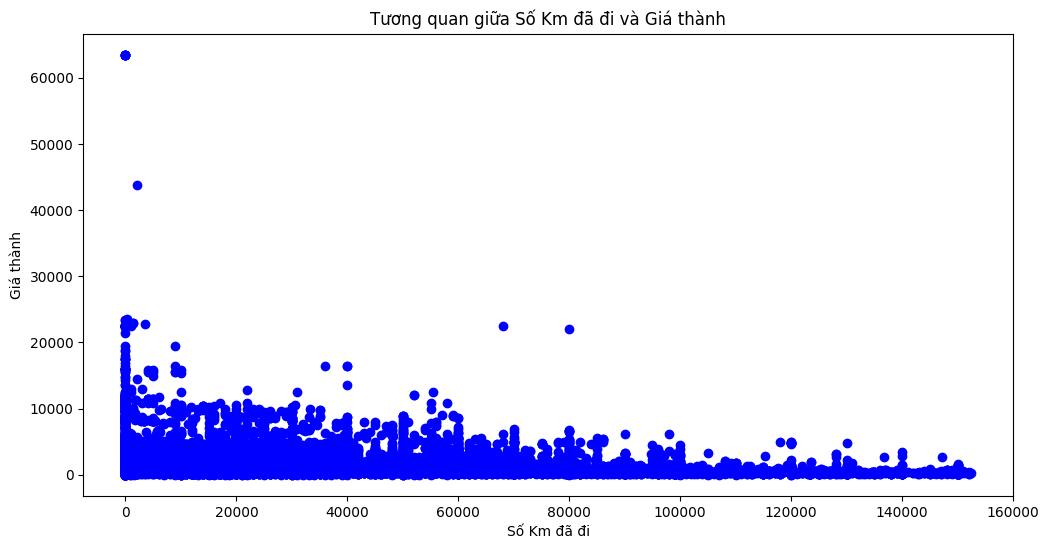

In [70]:

plt.figure(figsize=(12, 6))
plt.scatter(df['Số Km đã đi'], df['Giá thành'], c ="blue")
plt.title('Tương quan giữa Số Km đã đi và Giá thành')
plt.xlabel('Số Km đã đi')
plt.ylabel('Giá thành')
plt.show()


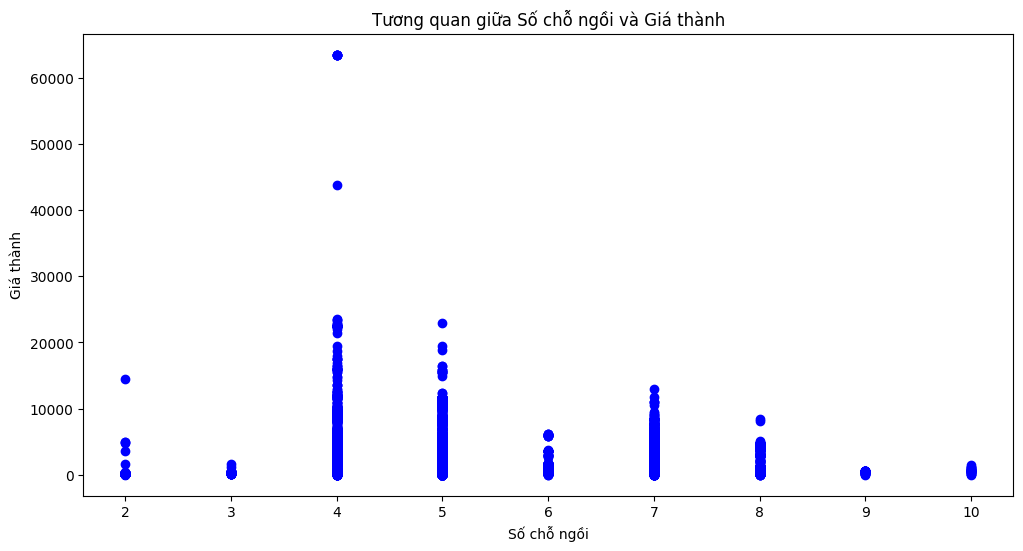

In [71]:

plt.figure(figsize=(12, 6))
plt.scatter(df['Số chỗ ngồi'], df['Giá thành'], c ="blue")
plt.title('Tương quan giữa Số chỗ ngồi và Giá thành')
plt.xlabel('Số chỗ ngồi')
plt.ylabel('Giá thành')
plt.show()


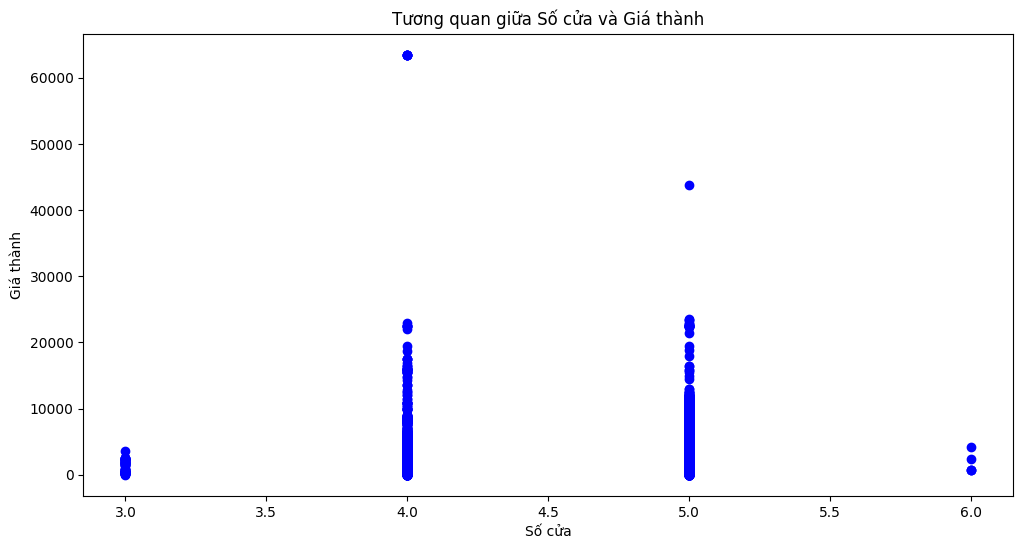

In [72]:

plt.figure(figsize=(12, 6))
plt.scatter(df['Số cửa'], df['Giá thành'], c ="blue")
plt.title('Tương quan giữa Số cửa và Giá thành')
plt.xlabel('Số cửa')
plt.ylabel('Giá thành')
plt.show()


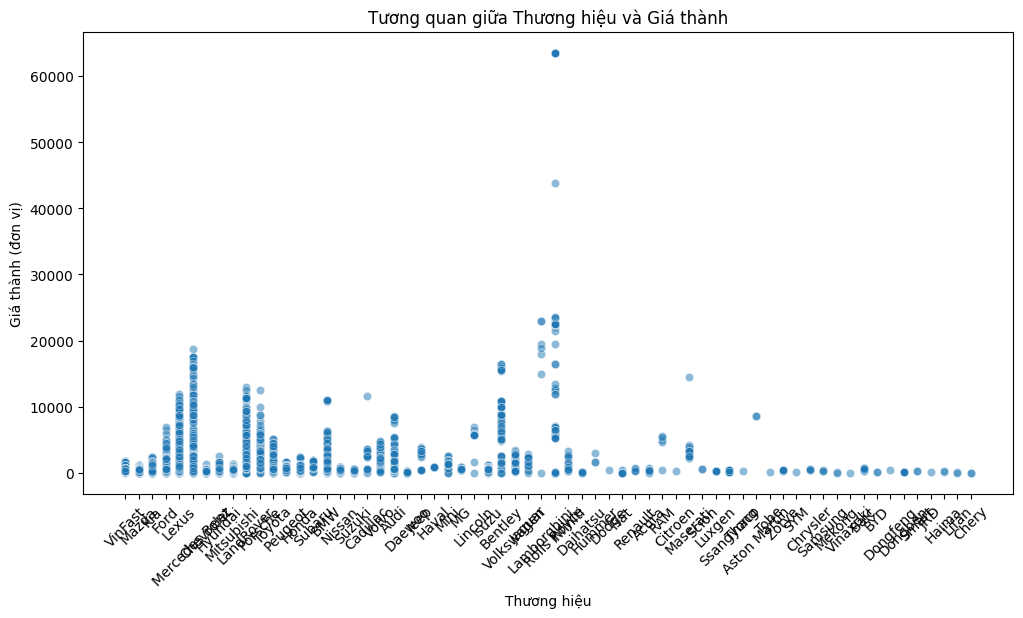

In [73]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Thương hiệu', y='Giá thành', data=df, alpha=0.5)
plt.title('Tương quan giữa Thương hiệu và Giá thành')
plt.xlabel('Thương hiệu')
plt.ylabel('Giá thành (đơn vị)')
plt.xticks(rotation=45)
plt.show()


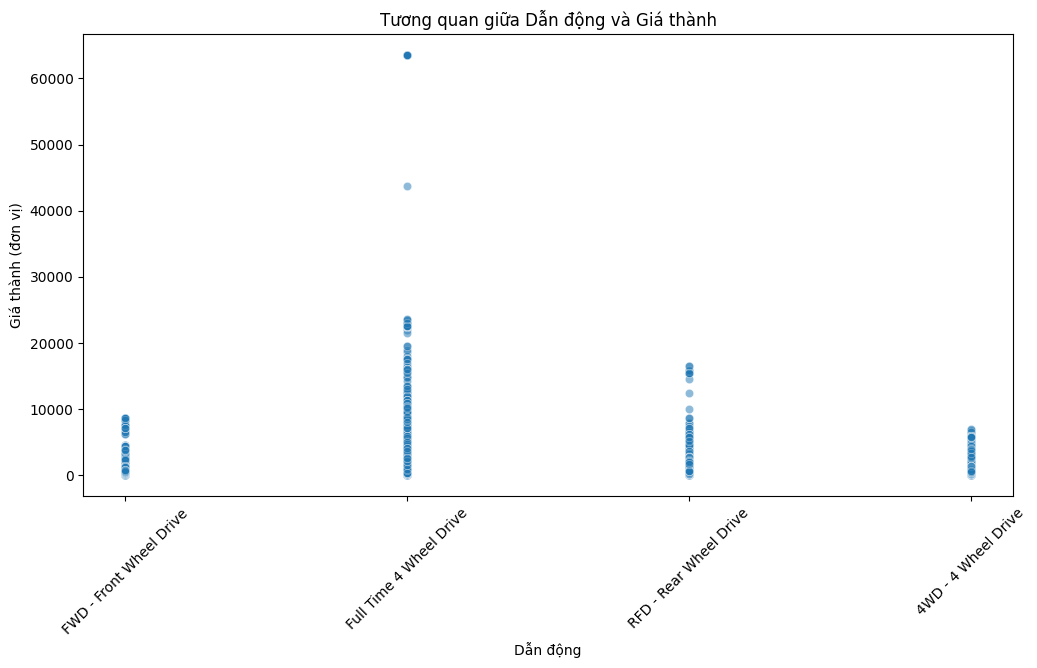

In [74]:

plt.figure(figsize=(12,6))
sns.scatterplot(x='Dẫn động', y='Giá thành', data=df, alpha=0.5)
plt.title('Tương quan giữa Dẫn động và Giá thành')
plt.xlabel('Dẫn động')
plt.ylabel('Giá thành (đơn vị)')
plt.xticks(rotation=45)
plt.show()

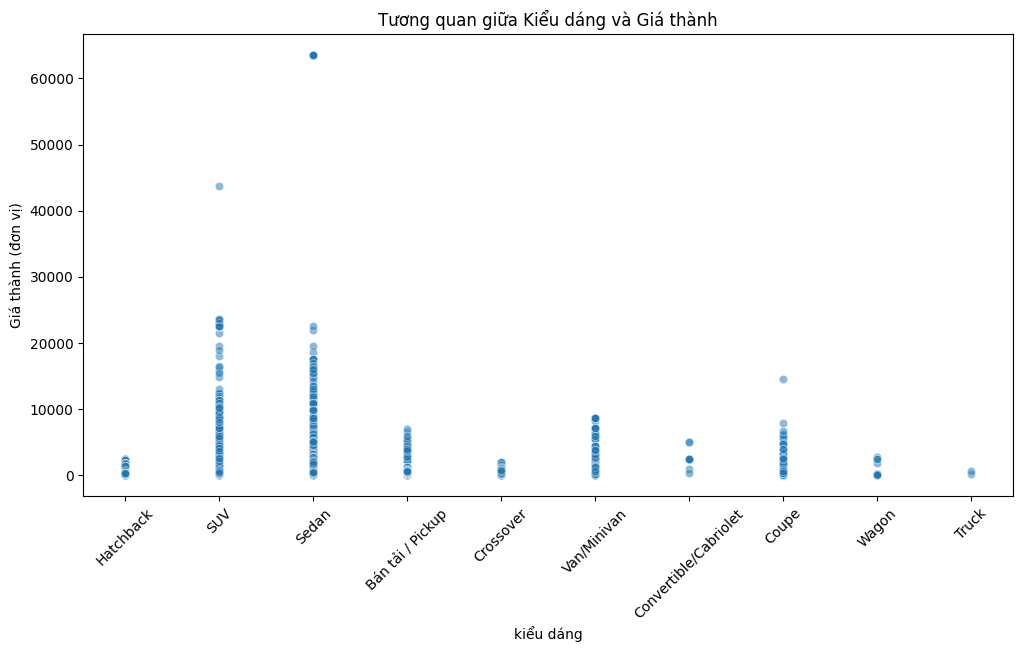

In [75]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Kiểu dáng', y='Giá thành', data=df, alpha=0.5)
plt.title('Tương quan giữa Kiểu dáng và Giá thành')
plt.xlabel("kiểu dáng")
plt.ylabel('Giá thành (đơn vị)')
plt.xticks(rotation=45)
plt.show()

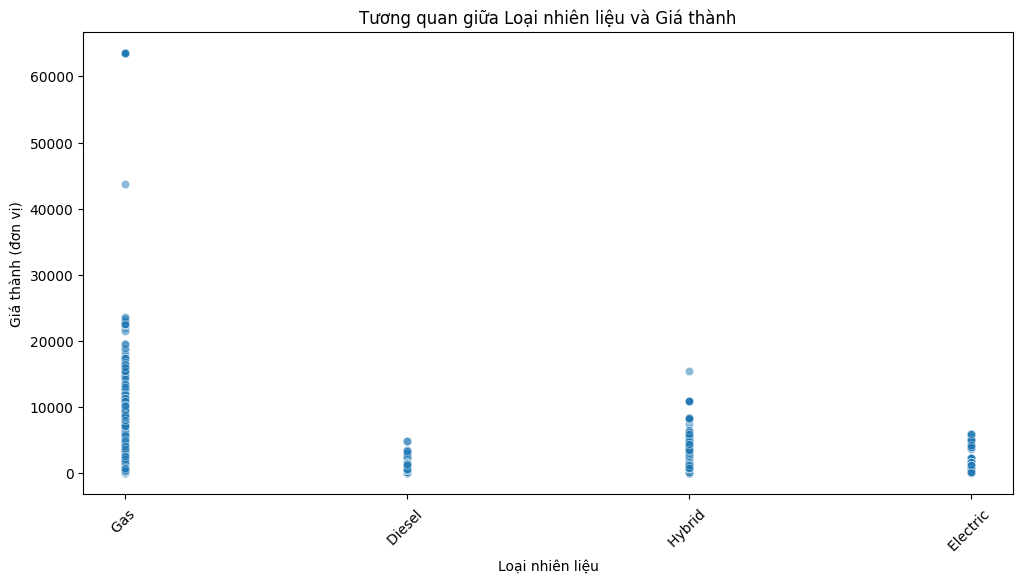

In [76]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Loại nhiên liệu', y='Giá thành', data=df, alpha=0.5)
plt.title('Tương quan giữa Loại nhiên liệu và Giá thành')
plt.xlabel("Loại nhiên liệu")
plt.ylabel('Giá thành (đơn vị)')
plt.xticks(rotation=45)
plt.show()

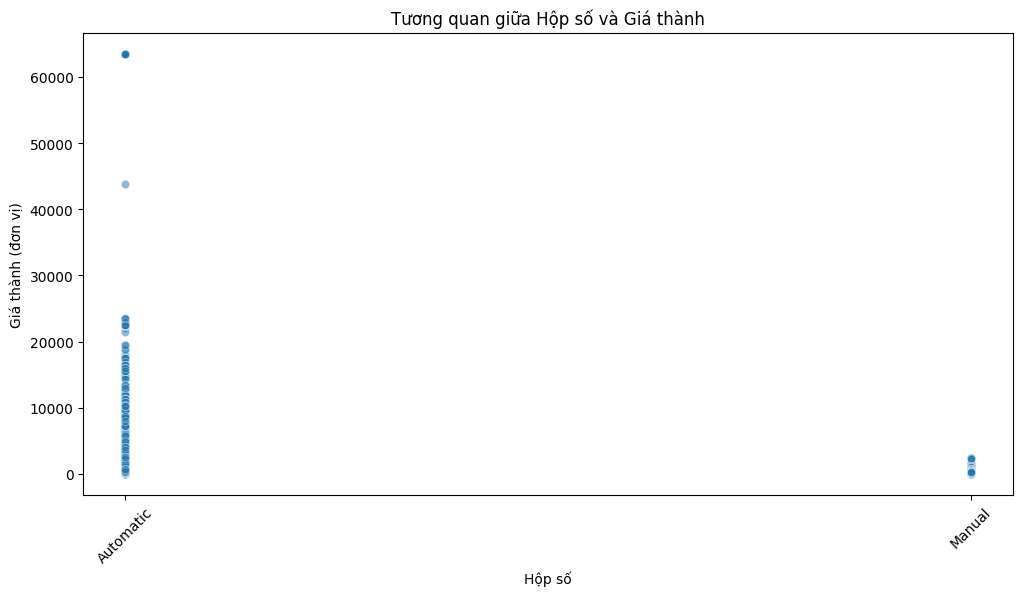

In [77]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Hộp số', y='Giá thành', data=df, alpha=0.5)
plt.title('Tương quan giữa Hộp số và Giá thành')
plt.xlabel("Hộp số")
plt.ylabel('Giá thành (đơn vị)')
plt.xticks(rotation=45)
plt.show()

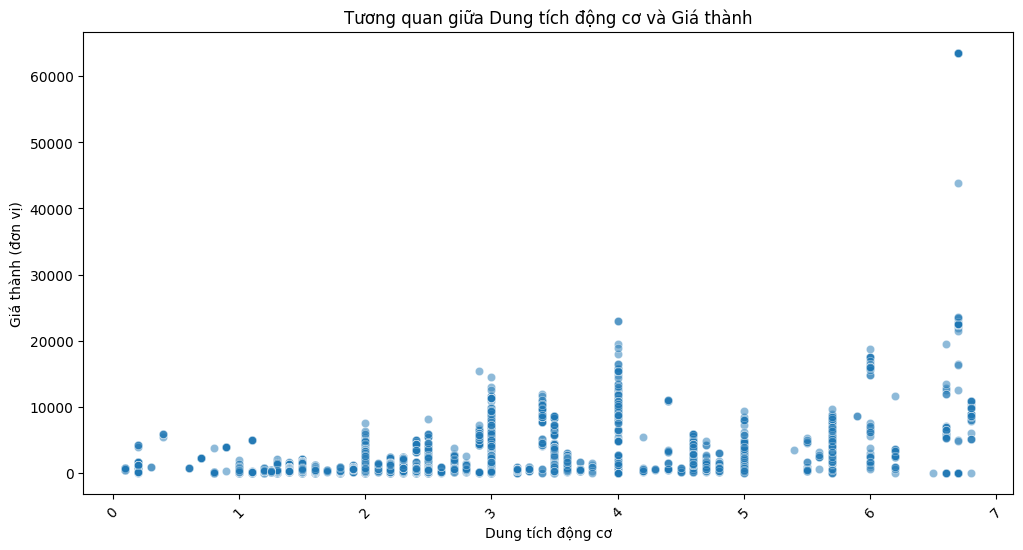

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Dung tích động cơ', y='Giá thành', data=df, alpha=0.5)
plt.title('Tương quan giữa Dung tích động cơ và Giá thành')
plt.xlabel("Dung tích động cơ")
plt.ylabel('Giá thành (đơn vị)')
plt.xticks(rotation=45)
plt.show()

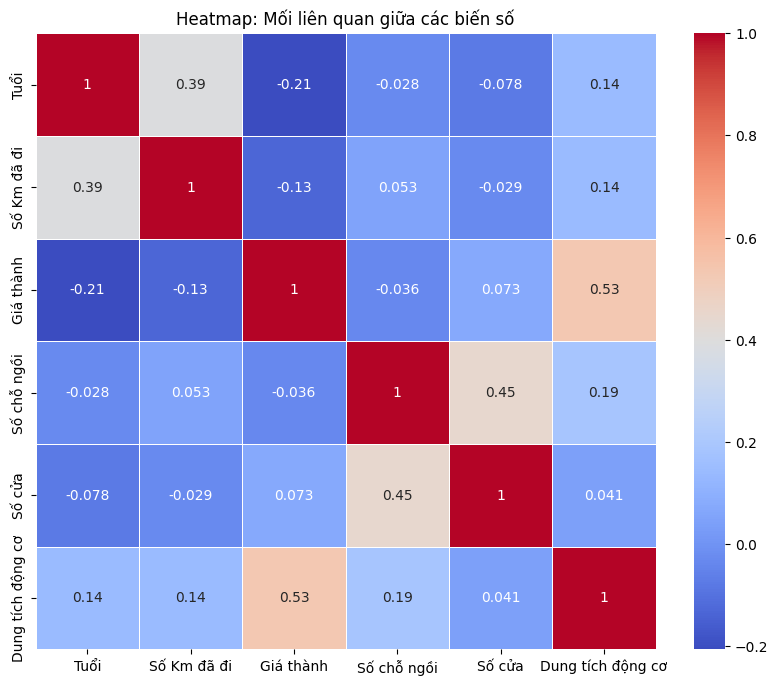

In [79]:
df = pd.read_csv('data.csv')


selected_columns = ['Tuổi', 'Số Km đã đi', 'Giá thành',"Số chỗ ngồi",'Số cửa','Dung tích động cơ']


correlation_matrix = df[selected_columns].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap: Mối liên quan giữa các biến số')
plt.show()